In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [34]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [5]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


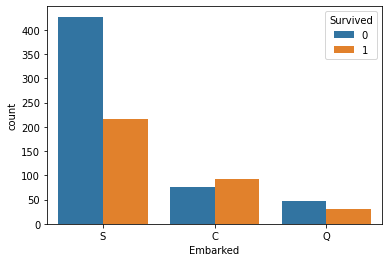

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


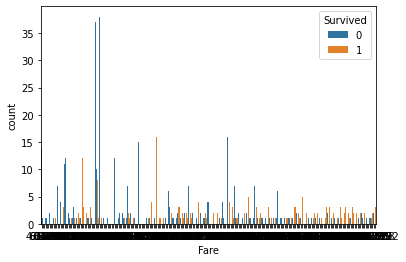

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(train_df.Embarked, hue=train_df.Survived)
plt.show()
sns.countplot(train_df.Fare, hue=train_df.Survived)
plt.show()

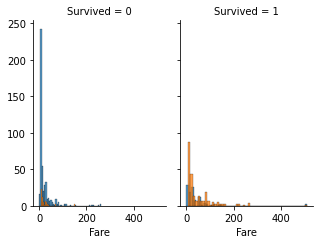

In [7]:
g = sns.FacetGrid(train_df, col="Survived", hue="Sex", height=3.5, aspect=.65)
g.map(sns.histplot, "Fare", bins=50)

In [51]:
vars = test_df.columns
test_df[vars].isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
relatives      0
Title          0
dtype: int64

In [9]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


vars = train.columns
print(train_df.shape)
train_df[vars].isnull().sum()

In [35]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

mode1 = train_df["Embarked"].mode().values[0]
train_df["Embarked"] = train_df["Embarked"].fillna(mode1)
test_df["Embarked"] = test_df["Embarked"].fillna(mode1)

In [ ]:
mode1

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [36]:
train_df['relatives'] = train_df['SibSp'] + train_df['Parch']
test_df['relatives'] = test_df['SibSp'] + test_df['Parch']
train_df[['relatives','Survived']].groupby(['relatives'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,relatives,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


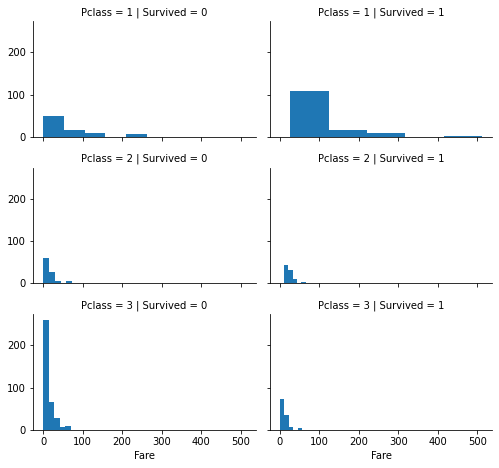

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fare', bins=5)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


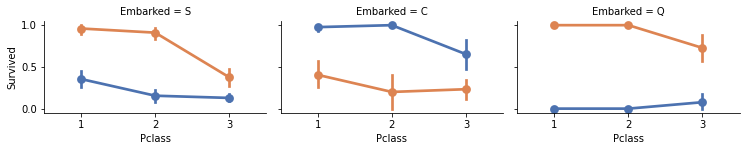

In [16]:
grid = sns.FacetGrid(train_df, col='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')

In [17]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


In [37]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [38]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [39]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [40]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
type(combine[0]['Age'][0])

In [ ]:
type(dataset['Age'])

In [41]:
for dataset in combine:  
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ (dataset['Age']) <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 35), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 55), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 55),'Age'] = 3

In [ ]:
dataset['Embarked'].head()

In [42]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [43]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 80), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 80), 'Fare']   = 3

In [44]:
train_df = train_df.drop(['Name','SibSp','Parch'], axis=1)
test_df = test_df.drop(['Name','SibSp','Parch'], axis=1)

In [52]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,relatives,Title
0,892,3,0,1,0.0,2,0,1
1,893,3,1,2,0.0,0,1,3
2,894,2,0,1,0.0,2,0,1
3,895,3,0,1,0.0,0,0,1
4,896,3,1,1,1.0,0,2,3


Now we can test with different models

In [52]:
X_train.head(5)

,Pclass,Sex,Age,Fare,Embarked,relatives
0,3,0,1,0.0,0,1
1,1,1,2,3.0,1,1
2,3,1,1,1.0,0,0
3,1,1,2,3.0,0,1
4,3,0,2,1.0,0,0


In [45]:
X_train = train_df.drop(['Survived'],axis=1)
Y_train = train_df['Survived']
X_test = test_df
print(X_train.shape, test_df.shape, Y_train.shape)

(891, 8) (418, 8) (891,)


In [46]:
X_train = X_train.drop(['PassengerId'],axis=1)
X_test = X_test.drop(['PassengerId'],axis=1)

In [47]:
X_train = X_train.drop(['Title'],axis=1)
X_test = X_test.drop(['Title'],axis=1)

In [48]:
median = test_df['Fare'].median()
test_df['Fare'] = test_df['Fare'].fillna(median)

In [49]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logrec = LogisticRegression(solver='lbfgs',max_iter=10000)
logrec.fit(X_train, Y_train)
predictions = logrec.predict(X_test)

logreg_data = pd.read_csv('/kaggle/input/titanic/test.csv')
logreg_data.insert((logreg_data.shape[1]),'Survived',predictions)
logreg_data.to_csv('LogisticRegression.csv')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [33]:
#SVC
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svc_data = pd.read_csv('/kaggle/input/titanic/test.csv')
svc_data = svc_data[['PassengerId']]
svc_data.insert((svc_data.shape[1]),'Survived',predictions)
svc_data.to_csv('SVC.csv')

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [93]:
#RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
rf_data = pd.read_csv('/kaggle/input/titanic/test.csv')
rf_data = rf_data[['PassengerId']]
rf_data.insert((rf_data.shape[1]),'Survived',predictions)
rf_data.to_csv('rf.csv')


In [126]:
#XGBOOST
import xgboost as xgb
gbm = xgb.XGBClassifier(
 n_estimators= 2000,
 max_depth= 8,
 min_child_weight= 2,
 gamma=0.5,                        
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, Y_train)
predictions = gbm.predict(X_test)
acc_gbm = round(gbm.score(X_train, Y_train) * 100, 2)
print(acc_gbm)
gbm_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gbm_data = gbm_data[['PassengerId']]
gbm_data.insert((gbm_data.shape[1]),'Survived',predictions)
gbm_data.to_csv('gbm.csv')

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:08:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
86.31


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [69]:
# Initialising the NN
import keras 
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()

# layers
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()


# Compiling the NN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the NN
model.fit(X_train_scaled, Y_train, batch_size = 32, epochs = 200)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_49 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 17        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.6100
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6535
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.7641
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5533 - accura

In [70]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

In [71]:
nn_data = pd.read_csv('/kaggle/input/titanic/test.csv')
nn_data = nn_data[['PassengerId']]
nn_data.insert((nn_data.shape[1]),'Survived',y_final)
nn_data.to_csv('nn6.csv')

In [64]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': range(0,5), 
              'n_estimators': range(0,10), 
              'max_features': ['sqrt', 'auto'], 
              'warm_start': [True]}

grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, n_jobs=-1, verbose=1).fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.61616345 0.61616345 0.61616345
 0.61616345 0.6296466  0.73638817 0.71161886 0.75309146 0.70598832
        nan 0.61616345 0.61616345 0.61616345 0.78673655 0.78673655
 0.78673655 0.78673655 0.78673655 0.78673655        nan 0.61616345
 0.61616345 0.62845396 0.68468395 0.685682   0.75200552 0.78458979
 0.78903396 0.77787333        nan 0.61616345 0.61616345 0.78679932
 0.78679932 0.78679932 0.78679932 0.78679932 0.78679932 0.79017011
        nan 0.61616345 0.61616345 0.71054548 0.75758584 0.79241102
 0.79801017 0.80026991 0.80026364 0.80028247        nan 0.61616345
 0.63414098 0.78792292 0.78792292 0.78904651 0.79803528 0

In [77]:
predictions = grid.predict(X_test)
acc_gbm = round(grid.score(X_train, Y_train) * 100, 2)
print(acc_gbm)
gbm_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gbm_data = gbm_data[['PassengerId']]
gbm_data.insert((gbm_data.shape[1]),'Survived',predictions)
gbm_data.to_csv('grid.csv')


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').